<a href="https://colab.research.google.com/github/alex-smith-uwec/NLP_Spring2025/blob/main/Inauguration_TF_IDF_Scikit_Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TF-IDF with Scikit-Learn
This notebook is adapted from one developed by [Melanie Walsh](https://melaniewalsh.github.io/Intro-Cultural-Analytics/05-Text-Analysis/03-TF-IDF-Scikit-Learn.html)

 A popular and effective method for text analysis is called *term frequency–inverse document frequency*, often abbreviated *tf-idf*. Tf-idf is a method that tries to identify the most distinctively frequent or significant words in documents across a corpus.

In this lesson, we're going to learn how to calculate tf-idf scores using a collection of plain text (.txt) files and the Python library scikit-learn, which has a quick and nifty module called [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html).

In this notebook we will calculate and normalize tf-idf scores for U.S. Inaugural Addresses with scikit-learn.

## Dataset

### U.S. Inaugural Addresses

<blockquote class="epigraph" style=" padding: 10px">

This is the meaning of our liberty and our creed; why men and women and children of every race and every faith can join in celebration across this magnificent Mall, and why a man whose father less than 60 years ago might not have been served at a local restaurant can now stand before you to take a most sacred oath.  So let us mark this day with remembrance of who we are and how far we have traveled.
<p class ="attribution">—Barack Obama, Inaugural Presidential Address, January 2009
    </p>
    
</blockquote>

During Barack Obama's Inaugural Address in January 2009, he mentioned "women" four different times, including in the passage quoted above. How distinctive is Obama's inclusion of women in this address compared to all other U.S. Presidents? This is one of the questions that we're going to try to answer with tf-idf.

## Breaking Down the TF-IDF Formula

But first, let's quickly discuss the tf-idf formula. The idea is pretty simple.

**tf-idf = term_frequency * inverse_document_frequency**

**term_frequency** = number of times a given term appears in document

**inverse_document_frequency** = log(total number of documents / number of documents with term) + 1**\***

You take the number of times a term occurs in a document (term frequency). Then you take the number of documents in which the same term occurs at least once divided by the total number of documents (document frequency), and you flip that fraction on its head (inverse document frequency). Then you multiply the two numbers together (term_frequency * inverse_document_frequency).

The reason we take the *inverse*, or flipped fraction, of document frequency is to boost the rarer words that occur in relatively few documents. Think about the inverse document frequency for the word "said" vs the word "pigeon." The term "said" appears in 13 (document frequency) of 14 (total documents) *Lost in the City* stories (14 / 13 --> a smaller inverse document frequency) while the term "pigeons" only occurs in 2 (document frequency) of the 14 stories (total documents) (14 / 2 --> a bigger inverse document frequency, a bigger tf-idf boost).

*There are a bunch of slightly different ways that you can calculate inverse document frequency. The version of idf that we're going to use is the [scikit-learn default](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html#sklearn.feature_extraction.text.TfidfTransformer), which uses "smoothing" aka it adds a "1" to the numerator and denominator:

**inverse_document_frequency**  = log((1 + total_number_of_documents) / (number_of_documents_with_term +1)) + 1

<div class="margin sidebar" style=" padding: 10px">

> If smooth_idf=True (the default), the constant “1” is added to the numerator and denominator of the idf as if an extra document was seen containing every term in the collection exactly once, which prevents zero divisions: idf(t) = log [ (1 + n) / (1 + df(t)) ] + 1.  
> -[scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html#sklearn.feature_extraction.text.TfidfTransformer)

</div>

## TF-IDF with scikit-learn

[scikit-learn](https://scikit-learn.org/stable/index.html), imported as `sklearn`, is a popular Python library for machine learning approaches such as clustering, classification, and regression. Though we're not doing any machine learning in this lesson, we're nevertheless going to use scikit-learn's `TfidfVectorizer` and `CountVectorizer`.

Install scikit-learn (not necessary in Colab)

In [ ]:
# !pip install sklearn

Import necessary modules and libraries

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd


#### Set Directory Path

Below we're setting the directory filepath that contains all the text files that we want to analyze.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Link to data file consisting of speeches

https://github.com/alex-smith-uwec/NLP_Spring2025/blob/main/US_Inaugural_Addresses.zip

In [ ]:
my_path="/content/drive/MyDrive/CS491/Data/US_Inaugural_Addresses/"

In [ ]:
file_names=!ls {my_path}
file_names=sorted(file_names)
# print(file_names)

In [ ]:
file_names

In [ ]:
# Split combined string by tabs and newlines, then filter out any empty strings
combined_string = ' '.join(file_names)
file_list = [name.strip() for name in combined_string.split() if name.strip() and '.' in name]

# Remove the extension from each file name
text_titles = sorted([name.split('.')[0] for name in file_list])



In [ ]:
text_titles

In [ ]:
import glob
text_files=glob.glob(f"{my_path}/*.txt")
text_files=sorted(text_files)

## Calculate tf–idf

To calculate tf–idf scores for every word, we're going to use scikit-learn's [`TfidfVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html).

When you initialize TfidfVectorizer, you can choose to set it with different parameters. These parameters will change the way you calculate tf–idf.

The recommended way to run `TfidfVectorizer` is with smoothing (`smooth_idf = True`) and normalization (`norm='l2'`) turned on. These parameters will better account for differences in text length, and overall produce more meaningful tf–idf scores. Smoothing and L2 normalization are actually the default settings for `TfidfVectorizer`, so to turn them on, you don't need to include any extra code at all.

Initialize TfidfVectorizer with desired parameters (default smoothing and normalization)

In [ ]:
tfidf_vectorizer = TfidfVectorizer(input='filename', stop_words='english')

Run TfidfVectorizer on our `text_files`

In [ ]:
tfidf_vector = tfidf_vectorizer.fit_transform(text_files)
#this is a sparse matrix

Make a DataFrame out of the resulting tf–idf vector, setting the "feature names" or words as columns and the titles as rows

In [ ]:
tfidf_df = pd.DataFrame(tfidf_vector.toarray(), index=text_titles, columns=tfidf_vectorizer.get_feature_names_out())

Add column for document frequency aka number of times word appears in all documents

In [ ]:
tfidf_slice = tfidf_df[['government', 'borders', 'people', 'war', 'honor','foreign', 'men', 'women', 'children','slave']]
tfidf_slice.sort_index().round(decimals=2)

In [ ]:
tfidf_slice = tfidf_df[['fought','liberty', 'freedom']]
tfidf_slice.sort_index().round(decimals=2)


# **A primitive search engine**

In [ ]:
# Slice for specific words and explicitly create a copy to avoid SettingWithCopyWarning
tfidf_slice = tfidf_df[['time', 'honor', 'war']].copy()

# Sum the TF-IDF scores for the selected words in each document
tfidf_slice['total_score'] = tfidf_slice.sum(axis=1)


# Sort documents by total_score in descending order to see which has the highest score
sorted_docs = tfidf_slice.sort_values(by='total_score', ascending=False)

# Get the index (document ID) of the document with the highest total_score
best_fit_document_index = sorted_docs.index[0]


# Select the top 3 documents
top_documents = sorted_docs.head(3)

# Display the indices (document IDs) and scores of the top 3 documents
print("Top 3 documents and their scores:")
print(top_documents[['total_score']])





Top 3 documents and their scores:
                 total_score
20_lincoln_1865     0.286626
07_madison_1813     0.275707
09_monroe_1821      0.175180


# **Document similarity**

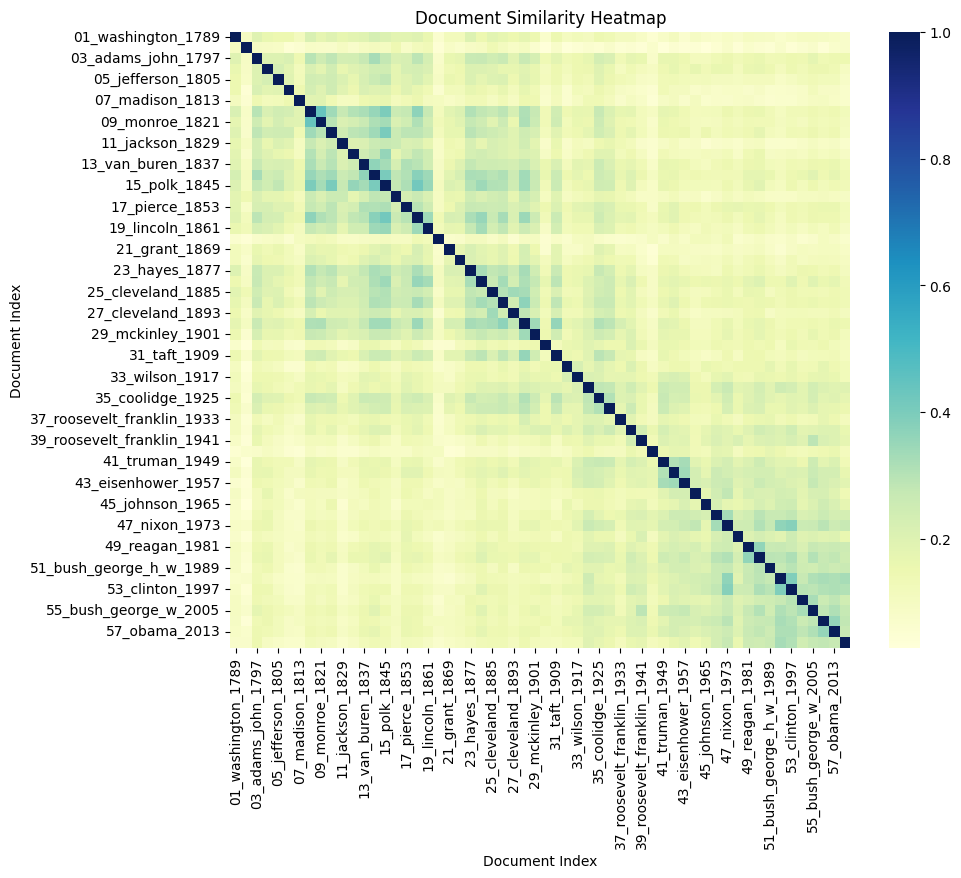

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Compute the dot product
similarity_matrix = tfidf_df.dot(tfidf_df.T)

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, cmap="YlGnBu")
plt.title('Document Similarity Heatmap')
plt.xlabel('Document Index')
plt.ylabel('Document Index')
plt.show()


**The cell below will take the title of one of the speeches and return the 3 most similar speechs as determined by cosine similarity.**

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def find_most_similar_docs_by_title(tfidf_vector, target_doc_title, text_titles, top_n=3):
    # Find the index of the target document based on its title
    if target_doc_title in text_titles:
        target_doc_index = text_titles.index(target_doc_title)
    else:
        return "The document title does not exist in the corpus."

    # Calculate cosine similarity between the target document and all documents in the corpus
    cosine_similarities = cosine_similarity(tfidf_vector[target_doc_index], tfidf_vector).flatten()

    # Get the indices of the top_n most similar documents, excluding the target document itself
    most_similar_doc_indices = cosine_similarities.argsort()[-top_n-1:-1][::-1]

    # Map indices to titles
    most_similar_doc_titles = [text_titles[i] for i in most_similar_doc_indices]

    # Return the titles of the top_n most similar documents
    return most_similar_doc_titles

# Example usage
target_doc_title = "53_clinton_1997"  # Replace with your actual document title
similar_docs_titles = find_most_similar_docs_by_title(tfidf_vector, target_doc_title, text_titles)
print("Titles of the 3 most similar documents:", similar_docs_titles)


Titles of the 3 most similar documents: ['52_clinton_1993', '47_nixon_1973', '50_reagan_1985']


# **k means**

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# Choose the number of clusters
num_clusters = 4 ##from silhouette below
# Initialize and fit KMeans algorithm
kmeans = KMeans(n_clusters=num_clusters, n_init=10,random_state=42)
kmeans.fit(tfidf_vector)



KMeans(n_clusters=4, n_init=10, random_state=42)

In [ ]:
# Predict the cluster for each document
clusters = kmeans.predict(tfidf_vector)

# Optionally, inspect the centroids
centroids = kmeans.cluster_centers_

# If you want to see which documents belong to which cluster
# for i, cluster in enumerate(clusters):
#     print(f"Document {i} belongs to cluster {cluster}.")

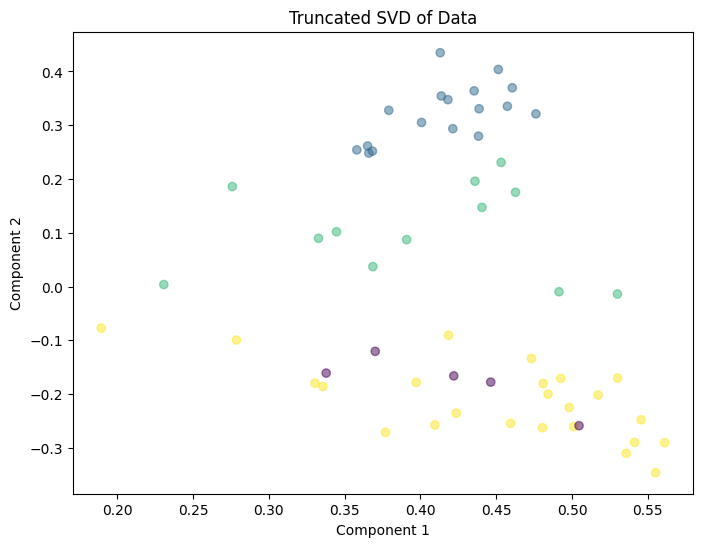

In [ ]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

# Initialize TruncatedSVD with desired number of components
# For example, to reduce to 2 dimensions, similar to what PCA was intended for
svd = TruncatedSVD(n_components=8)

# Perform dimensionality reduction on sparse TF-IDF vector
X_svd = svd.fit_transform(tfidf_vector)

# Plot with generic cluster colors
plt.figure(figsize=(8, 6))
plt.scatter(X_svd[:, 0], X_svd[:, 1], c=clusters, alpha=0.5)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Truncated SVD of Data')
plt.show()

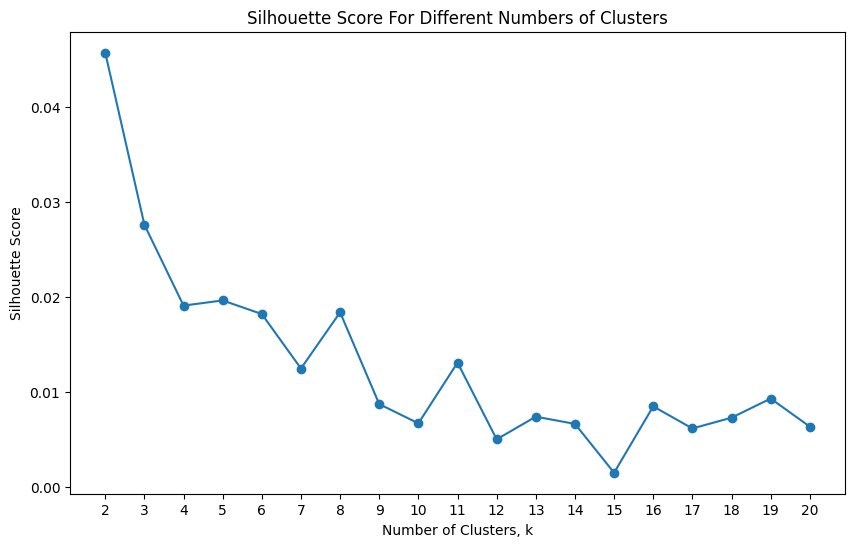

In [ ]:
from sklearn.metrics import silhouette_score


# Assuming `embeddings` is your data
silhouette_scores = []
K_range = range(2, 21)  # Silhouette score is not defined for a single cluster

for k in K_range:
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(X)
    labels = kmeans.labels_
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(K_range, silhouette_scores, marker='o')
plt.title('Silhouette Score For Different Numbers of Clusters')
plt.xlabel('Number of Clusters, k')
plt.ylabel('Silhouette Score')
plt.xticks(K_range)
plt.show()

# **Other sorting**

Let's drop "OO_Document Frequency" since we were just using it for illustration purposes.

In [ ]:
tfidf_df = tfidf_df.drop('00_Document Frequency', errors='ignore')

Let's reorganize the DataFrame so that the words are in rows rather than columns.

In [ ]:
tfidf_df.stack().reset_index()

In [ ]:
tfidf_df = tfidf_df.stack().reset_index()

In [ ]:
tfidf_df = tfidf_df.rename(columns={0:'tfidf', 'level_0': 'document','level_1': 'term', 'level_2': 'term'})

To find out the top 10 words with the highest tf–idf for every story, we're going to sort by document and tfidf score and then groupby document and take the first 10 values.

In [ ]:
tfidf_df.sort_values(by=['document','tfidf'], ascending=[True,False]).groupby(['document']).head(10)

,document,term,tfidf
3707,01_washington_1789,government,0.113681
4108,01_washington_1789,immutable,0.103883
4175,01_washington_1789,impressions,0.103883
6337,01_washington_1789,providential,0.103883
5631,01_washington_1789,ought,0.103728
...,...,...,...
518409,58_trump_2017,obama,0.120288
518766,58_trump_2017,people,0.112370
521001,58_trump_2017,thank,0.109171
513989,58_trump_2017,borders,0.107075


In [ ]:
top_tfidf = tfidf_df.sort_values(by=['document','tfidf'], ascending=[True,False]).groupby(['document']).head(10)

We can zoom in on particular words and particular documents.

In [ ]:
top_tfidf[top_tfidf['term'].str.contains('women')]

,document,term,tfidf
503861,56_obama_2009,women,0.084859


It turns out that the term "women" is very distinctive in Obama's Inaugural Address.

In [ ]:
top_tfidf[top_tfidf['document'].str.contains('obama')]

In [ ]:
top_tfidf[top_tfidf['document'].str.contains('lincoln')]

In [ ]:
top_tfidf[top_tfidf['document'].str.contains('kennedy')]

## Visualize TF-IDF

We can also visualize our TF-IDF results with the data visualization library Altair.

In [ ]:
# !pip install altair

Let's make a heatmap that shows the highest TF-IDF scoring words for each president, and let's put a red dot next to two terms of interest: "war" and "peace":

The code below was contributed by [Eric Monson](https://github.com/emonson). Thanks, Eric!

In [ ]:
import altair as alt
import numpy as np

# Terms in this list will get a red dot in the visualization
term_list = ['war', 'peace']

# adding a little randomness to break ties in term ranking
top_tfidf_plusRand = top_tfidf.copy()
top_tfidf_plusRand['tfidf'] = top_tfidf_plusRand['tfidf'] + np.random.rand(top_tfidf.shape[0])*0.0001

# base for all visualizations, with rank calculation
base = alt.Chart(top_tfidf_plusRand).encode(
    x = 'rank:O',
    y = 'document:N'
).transform_window(
    rank = "rank()",
    sort = [alt.SortField("tfidf", order="descending")],
    groupby = ["document"],
)

# heatmap specification
heatmap = base.mark_rect().encode(
    color = 'tfidf:Q'
)

# red circle over terms in above list
circle = base.mark_circle(size=100).encode(
    color = alt.condition(
        alt.FieldOneOfPredicate(field='term', oneOf=term_list),
        alt.value('red'),
        alt.value('#FFFFFF00')
    )
)

# text labels, white for darker heatmap colors
text = base.mark_text(baseline='middle').encode(
    text = 'term:N',
    color = alt.condition(alt.datum.tfidf >= 0.23, alt.value('white'), alt.value('black'))
)

# display the three superimposed visualizations
(heatmap + circle + text).properties(width = 600)

alt.LayerChart(...)